# <font color='blue'> Movimiento browniano 

La colección de variables aleatorias $X(t), t \geq 0$ es un **movimiento browniano** de parámetros $\mu$ y $\sigma^2$ si satisface:  

* $X(0)$ es una constante dada.

* Para todo $y$ y $t$ positivos, la variable aleatoria $X(t+y)-X(y)$ es independiente de los valores del proceso hasta el  tiempo $y$ y tiene una distribución normal con media $μt$ y varianza $t \sigma^2$ 

Comentarios.

* El proceso queda determinado solo por el valor presente y ninguno del pasado el que determina los valores futuros.
* $X(t)$ es, con probabilidad 1, una función continua de $t$.
* Pero no es diferenciable.
* EL movimiento browniano es el límite de modelos más simples, como las caminatas aleatorias (del modelo binomial).

### <font color='blue'> Movimiento Browniano Geometrico

Sea  $X(t), t \geq 0$ un movimiento browniano de parámetros $\mu$ y $\sigma^2$, y sea:
    
$$S(t)=e^{X(t)}, t \geq 0$$

El proceso $S(t), t \geq 0$ se dice que es un movimiento browniano geometrico con parámetros $\mu$ y $\sigma^2$. 
    

Entonces:

$$\log \Bigg( \frac{S(t+y)}{S(y)} \Bigg)$$

es independiente del proceso y tiene distribución normal con media $\mu t$ y varianza $\sigma^2 t$.

#### Modelación de las acciones.

Si $P_t$ es el precio de una acción en el tiempo $t$, entonces el rendimiento logaritmizado 
es $R_t = \log(\frac{P_t}{P_{t-1}})$, para $t=1,2,3...$ y normalmente ocurre que:

$$R_t \sim N(\mu, \sigma)$$

El uso del rendimiento logaritmizado se justifica como una buena aproximación:

$$R_t \approx \frac{P_t - P_{t-1}}{P_{t-1}}$$ 

debido a que el orden de los rendimientos es de $10^{-3}$ y se hace uso de $\log (1 + x) \approx x$.

Ahora, si se reescribe la cantidad $\frac{P_t}{P_0}$ como:

$$\frac{P_t}{P_0} = \frac{P_t}{P_{t-1}} \cdot \frac{P_{t-1}}{P_{t-2}} \cdot \frac{P_{t-2}}{P_{t-3}} \cdot ... \cdot \frac{P_2}{P_1} \cdot \frac{P_1}{P_0} $$

Al tomar el logaritmo:

$$\log( \frac{P_t}{P_0}) = R_t + R_{t-1} + ... + R_2 + R_1$$

Si suponemos que los rendimientos $R_i$ son independientes y tienen una misma distribución, 
con $E[R_i]= \mu$ y $V[R_i]=\sigma^2$, entonces para $t$ grande, por el teorema central del límite esto 
sigue una distribución normal (para más de 30 días) y se tendrá:

$$E \Bigg[\log \frac{P_t}{P_o} \Bigg]= E[R_t]+E[R_{t-1}]+...+E[R_1]= t\mu$$


$$V \Bigg[\log \frac{P_t}{P_o} \Bigg]= V[R_t]+V[R_{t-1}]+...+V[R_1]= t\sigma^2$$

Y se tendría que:

$$\log \Bigg( \frac{P_t}{P_0} \Bigg) \sim N(\mu t, \sigma \sqrt t)$$

Por lo que se puede escribir:

$$P_t=P_0 e^{\mu t +\sigma \beta_t}$$

donde $\beta_t$ es un movimiento browniano en $(0,t)$ y $E[\beta_t]=0$ y $V[\beta_t]=t$

Y la igualdad anterior también se puede escribir como:

$$P_t=P_0 e^{\mu t + \sigma \sqrt t z}$$

donde $z \sim N(0,1)$.

Esta última ecuación nos permite ya construir una simulación.

In [1]:
from random import gauss
from math import exp
import matplotlib.pyplot as plt

In [2]:
mu=0.001 
sigma=0.04  #sigma
p0=10
t=30

In [3]:
def trayectoria(mu,sigma,p0,t):
    l=[p0]
    pt=p0
    for i in range(t):
        pt=pt*exp(mu + sigma*gauss(0,1))
        l.append(pt)
    return l

In [4]:
l=trayectoria(mu, sigma,p0,t)

In [5]:
print(l)

[10, 10.251214089001348, 10.01068363062848, 9.592311173985134, 9.326426037128172, 8.817728358442801, 8.558243198212693, 8.17037977444971, 8.577219324901675, 8.415071169481015, 8.52765339847553, 8.063482212210562, 7.6351776137521865, 7.623409986807645, 7.454622320842585, 7.265346144496999, 7.512566919716792, 7.812932488097378, 7.935623062523723, 7.7904151302431135, 8.240219486808082, 8.4991474925362, 8.88210840983891, 8.587401188828874, 8.016387159374759, 7.9493623404860205, 8.144493238110531, 7.705036904881804, 7.111151734395273, 7.070265664580673, 7.051597326769365]


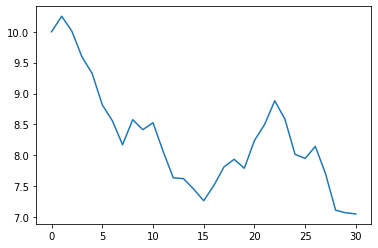

In [6]:

plt.plot(l)
plt.show()

In [7]:
mu=0.001
sigma=0.04
p0=10
t=200

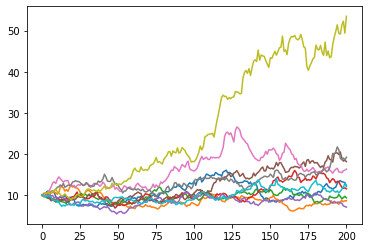

In [8]:
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

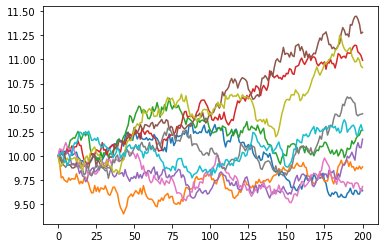

In [10]:
mu=0.0001    #con mu y sigma pequeña
sigma=0.004  
p0=10
t=200
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

#### Ejercicio 

Estudiar el comportamiento de las trayectorias al variar $\mu$ y $\sigma$.

Entonces, sabiendo que $P_t=P_0 e^{\mu t +\sigma \beta_t}=P_t=P_0 e^{\mu t + \sigma \sqrt t z}$, 
¿cuál es el valor esperado de $P_t$?

Tendríamos:

$$E[P_t]=E[P_0 e^{\mu t + \sigma \sqrt t z}] = P_0 E[e^{\mu t + \sigma \sqrt t z}]$$

Y para poder evaluar esto, necesitamos utilizar la función generadora de momentos:
    
$$\mu_x(s)=e^{\mu s + \frac{\sigma^2 s^2}{2}}$$

De manera que:
    
$$E[P_t]=P_0 e^{(\mu + \frac{\sigma}{2})t}$$

Y la varianza:
    
$$V[P_t]=P_0^2e^{2\mu t}(e^{2t\sigma^2}-e^{t\sigma^2})$$

Pero la cuestión práctica es: ¿Dados los precios de una acción, $P_0, P_1,...,P_t$, ¿cómo estimar $\mu$ y $\sigma$?

Recordando que:

$$R_t \sim N(\mu, \sigma)$$

y

$$\hat{\mu} = \frac{\sum_{t=1}^{T}R_t}{T}$$

y

$$\hat{\sigma}=\sqrt{\frac{1}{T-1} \sum_{t=1}^T (R_t - \hat{\mu})^2}$$

En la práctica, dados:
$$P_0, P_1, P_2, P_3, ...$$

Calculamos:
    
$$R_1=\log(\frac{P_1}{P_0})$$

$$R_1=\log(\frac{P_2}{P_1})$$

$$R_1=\log(\frac{P_3}{P_2})$$

$$R_1=\log(\frac{P_4}{P_3})$$

$$...$$

Y calculamos la media y la desviación estándar de estos valores, y podemos observar que:

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} > 0$, la acción tiende a crecer.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} \approx 0$, la acción tiende a permanecer constante.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} < 0$, la acción tiende a decrecer.

Y podemos implementar esto con el siguiente código, usando la librería investpy.

In [ ]:
from statistics import mean,stdev,pstdev
from math import log
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import investpy

Pero antes, recordemos un poco de Pandas

Cargamos los datos y los guardamos.

In [ ]:
df=investpy.get_stock_historical_data(stock="DIS",country="Mexico",from_date="01/01/2022", to_date="31/05/2022")

df.to_csv("datos.csv")

Podemos usar las funciones de Pandas para analizar los datos.

In [ ]:
type(df) # Checamos el tipo de dato

In [ ]:
df.shape # Este es un atributo, no una función. Devuelve (número de renglones, número de columnas)

In [ ]:
df

In [ ]:
print(df.head()) # La función head() muestra los primeros 5 renglones del data frame

Generalmente, comenzamos a analizar un data frame conociendo su tamaño y la información que contiene.

In [ ]:
df.columns # Da el nombre de las columnas

Cada columna debe ser del mismo tipo, pero un renglón puede tener objetos de diferentes tipos.

In [ ]:
df.dtypes # Da el tipo de objeto que guardan las columnas

In [ ]:
df.info() # Esta función da información más amplia

Podemos elegir columnas en particular para visualizar.

In [ ]:
c_df=df['Close'] # Elejimos la columna y la guardamos como una nueva variable

In [ ]:
c_df.head() # mostramos los primeros 5 renglones

In [ ]:
c_df.tail() # mostramos los últimos 5 renglones

In [ ]:
o_df=df.Open # También podemos elegir la columna nombrandola directamente

In [ ]:
o_df.head()

In [ ]:
subset=df[['Open','Close']] # Para especificar varias columnas usamos corchetes dobles

In [ ]:
subset.head()

In [ ]:
subset.head(n=10) # podemos ver más renglones

In [ ]:
subset.tail()

In [ ]:
subset # se puede imprimir todo

In [ ]:
subset.ix[0] # revisar: iloc, loe

In [ ]:
df[50:55]['Close']

Podemos graficar los precios y calcular las estadisticas de los rendimientos logaritmizados

In [ ]:
datos=investpy.get_stock_historical_data(stock="DIS",country="Mexico",from_date="24/05/2021", to_date="24/05/2022")

datos.to_csv("datos.csv")


datos=pd.read_csv("datos.csv",header=0,index_col="Date",parse_dates=True) #le peidmos leer los datos del csv 


ts=datos["Close"] #que tome los valores de precio de cierre de la acci+on 
print(ts)

lp=[] #creamos una lista vacia para los precios 

for i in range(len(ts)):
     lp.append(ts.iloc[i])
plt.plot(lp) #grafica de los precios
plt.show()

#calcular los rendimientos

lr=[] #lista de rendimientos
for i in range(1,len(lp)):
     lr.append((lp[i-1]/lp[i])-1) #para lso rendimientos usamos la formula de el precio de cierre anterior entre el precio de cierre actual menos 1

print(f"\n El rendimiento medio es: {mean(lr)},\n La desviación muestral es: {stdev(lr)} \n La desviación poblacional es: {pstdev(lr)}")




Y podemos visualizar el rendimiento

In [ ]:
lr=[]
for i in range(1,len(lp)):
    lr.append(log(lp[i]/lp[i-1]))
plt.plot(lr)
plt.show()
print(mean(lr), stdev(lr))

Y graficarlos juntos, mostrará las fluctuaciones en los mismos puntos

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)

#### Opciones

Entonces, Tenemos que $P_t=P_0 e^{\mu t +\sigma \beta_t}$

De manera que:
    
$$E[P_t]=P_0 e^{(\mu + \frac{\sigma}{2})t}$$

Podemos reescribir el precio como:
    
$$P_t=P_0 e^{(\mu - \frac{\sigma}{2})t + \sigma \beta_t}$$

O más convenientemente como:

<font color='blue'>$$P_t=P_0 e^{(\mu - \frac{\sigma}{2})t + \sigma \sqrt{t} z}$$
    
con $z \sim N(0, 1)$

Ahora con:
    
$$E[P_t]=P_0 e^{\mu t}$$

Para el caso de una opción europea (contrato a tiempo fijo), con precio de ejercicio k, al tiempo t. 
Se tienen las alternativas:
    
* Si $p>k$ se compra
* Si $p \leq k$ no se compra

El valor esperado de la ganancia es:

$$E[(P_t - k)^t]$$

Y aquí va un desarrollo matemático...

In [ ]:
from random import gauss
from math import exp, sqrt

In [ ]:
def f(p0, t0, t, mu, sigma):
    h=(mu - (sigma**2)/2)*(t-t0) + sigma*sqrt(t-t0)*gauss(0,1)
#    h=(mu - (sigma**2)/2)*(t-t0) + sigma*gauss(0, sqrt(t-t0))
    p=p0*exp(h)
    return p

In [ ]:
n = 1000000
mu = 0.004
sigma = 0.03
p0 = 10
suma = 0

for i in range(n):
    p30 = f(p0, 0, 30, mu, sigma)
    p70 = f(p30, 30, 70, mu, sigma)
    suma = suma + 100*(p70 - p30)/p30
print(suma/n)